In [447]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tarfile

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical



## Obtendo dados

In [ ]:
import os
import zipfile
from google.colab import files
uploaded = files.upload()

In [ ]:
local_zip = '/content/blood.zip' # Caminho referente ao local onde os dados são armazenados quando é feito o upload manualmente
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

In [ ]:
# Unused
# from google.colab import files
# uploaded = files.upload()



In [ ]:
# Unused
# tar = tarfile.open('/content/blood.tar.xz')
# tar.getnames()

In [ ]:
# Extraindo arquivos - Unused
# !tar xf blood.tar.xz --wildcards 'blood/*'


In [469]:
# Diretorio com imagens de treino de eosinofilo
train1 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/train/eosinofilo')
# Diretorio com imagens de validação de eosinofilo 
valid1 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/valid/eosinofilo')

# Diretorio com imagens de treino de linfocito
train2 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/train/linfocito')
# Diretorio com imagens de validação de linfocito 
valid2 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/valid/linfocito')

# Diretorio com imagens de treino de monocito
train3 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/train/monocito')
# Diretorio com imagens de validação de monocito 
valid3 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/valid/monocito')

# Diretorio com imagens de treino de neutrofilo
train4 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/train/neutrofilo')
# Diretorio com imagens de validação de neutrofilo 
valid4 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/valid/neutrofilo')

print('total train eosinofilo:', len(os.listdir(train1)))
print('total valid eosinofilo:', len(os.listdir(valid1)))

print('total train linfocito:', len(os.listdir(train2)))
print('total valid linfocito:', len(os.listdir(valid2)))

print('total train monocito:', len(os.listdir(train3)))
print('total valid monocito:', len(os.listdir(valid3)))

print('total train neutrofilo:', len(os.listdir(train4)))
print('total valid neutrofilo:', len(os.listdir(valid4)))

total train eosinofilo: 2497
total valid eosinofilo: 623
total train linfocito: 2483
total valid linfocito: 620
total train monocito: 2478
total valid monocito: 620
total train neutrofilo: 2499
total valid neutrofilo: 624


## Normalização e Input dos dados

In [470]:
# Normalização dos dados (RGB = 255)
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Treinamento com os dados do drive
# train_generator = train_datagen.flow_from_directory(
#         '/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/train',  # This is the source directory for training images
#         classes = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo'],
#         target_size=(200, 200),  # All images will be resized to 200x200
#         batch_size=10,
#         class_mode='categorical')

# Treinamento com os dados a partir do zip
train_generator = train_datagen.flow_from_directory(
        '/content/blood/train',  # This is the source directory for training images
        classes = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=10,
        class_mode='categorical')

# Validação com os dados do drive
# validation_generator = validation_datagen.flow_from_directory(
#         '/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/valid/',  # This is the source directory for validating images
#         classes = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo'],
#         target_size=(200, 200),  # All images will be resized to 200x200
#         batch_size=10,
#         class_mode='categorical',
#         shuffle=True)

# Validação com os dados do zip
validation_generator = validation_datagen.flow_from_directory(
        '/content/blood/valid',  # This is the source directory for validating images
        classes = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=10,
        class_mode='categorical',
        shuffle=True)


Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [450]:
train_generator.image_shape

(200, 200, 3)

## Rede Neural Simples

In [318]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10

model = models.Sequential([
        layers.Flatten(input_shape=(200,200,3)),
        layers.Dense(256, activation='relu'), # primeiro argumento é a quantidade de neurons
        layers.Dense(128, activation='relu'),
        layers.Dense(4, activation='sigmoid') # o ultimo tem 10, pois é a quantidade de classes    
    ])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [319]:
model.fit(train_generator, epochs=5)

Epoch 1/5
996/996 [==============================] - 20s 20ms/step - loss: 10.8319 - accuracy: 0.2530
Epoch 2/5
996/996 [==============================] - 20s 20ms/step - loss: 1.3866 - accuracy: 0.2455
Epoch 3/5
996/996 [==============================] - 20s 20ms/step - loss: 1.3864 - accuracy: 0.2524
Epoch 4/5
996/996 [==============================] - 20s 20ms/step - loss: 1.3865 - accuracy: 0.2464
Epoch 5/5
996/996 [==============================] - 20s 20ms/step - loss: 1.3864 - accuracy: 0.2569


In [ ]:
model.evaluate(train_generator)

## Arquitetura da Rede

In [451]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

def buid_model(shape=(200,200,3)):
    #Constroi as camadas da rede e retorna o build do modelo

    model = tf.keras.models.Sequential()

    # Primeira camada add o shape do input
    model.add(Conv2D(filters=64, kernel_size=4, activation='relu',input_shape=shape))
    # Tamanho downsampling - redução da "resolução"
    model.add(MaxPooling2D(pool_size=2))
    # Fração das unidades que serão zeradas para evitar overfitting
    model.add(Dropout(0.3))

    # Segunda Camada
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))

    # Terceira Camada
    model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))

    # Transformando o output em array
    model.add(Flatten())

    # Camada full-connected
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    # Camada de saida com o resultado das classes - 4 classes
    model.add(Dense(4, activation='sigmoid'))

    return model


    

In [452]:
model = buid_model()


In [ ]:
model.summary()

## Compilação
Compilar o modelo definindo: otimizador,metrica e loss function



*   Loss: iremos usar o categorical ao invés do binário pois temos 4 classes






In [454]:
# model.compile(loss='categorical_crossentropy',
#               optimizer='SGD',
#               metrics=['accuracy'])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Treinamento

Verificar posteriormente a parte de callbacks

In [455]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

checkpoint = ModelCheckpoint('chest_orientation_model.hdf5',
                            monitor='val_loss',
                            verbose=1, mode='min',
                            save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0.001,
                           patience=8,
                           mode='min',
                           verbose=1)

In [457]:
model.fit(train_generator,
          steps_per_epoch = train_generator.samples//40,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples//40,
          epochs=20)

Epoch 1/20
248/248 [==============================] - 7s 29ms/step - loss: 1.3871 - accuracy: 0.2431 - val_loss: 1.3861 - val_accuracy: 0.2371
Epoch 2/20
248/248 [==============================] - 7s 28ms/step - loss: 1.3866 - accuracy: 0.2431 - val_loss: 1.3845 - val_accuracy: 0.2710
Epoch 3/20
248/248 [==============================] - 7s 29ms/step - loss: 1.3882 - accuracy: 0.2476 - val_loss: 1.3873 - val_accuracy: 0.2532
Epoch 4/20
248/248 [==============================] - 7s 29ms/step - loss: 1.3869 - accuracy: 0.2480 - val_loss: 1.3866 - val_accuracy: 0.2355
Epoch 5/20
248/248 [==============================] - 7s 28ms/step - loss: 1.3871 - accuracy: 0.2471 - val_loss: 1.3864 - val_accuracy: 0.2452
Epoch 6/20
248/248 [==============================] - 7s 28ms/step - loss: 1.3865 - accuracy: 0.2520 - val_loss: 1.3857 - val_accuracy: 0.2806
Epoch 7/20
248/248 [==============================] - 7s 28ms/step - loss: 1.3867 - accuracy: 0.2402 - val_loss: 1.3863 - val_accuracy: 0.2597

In [458]:
model.evaluate(validation_generator)

249/249 [==============================] - 5s 20ms/step - loss: 1.3865 - accuracy: 0.2493


[1.3864773511886597, 0.24929633736610413]

## Transfer Learning (última esperança??)

In [471]:
import os
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2 as Inception
import keras.backend as K
from PIL import Image
IMG_SIZE = (200, 200)

In [472]:
core_idg = ImageDataGenerator(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip=True, 
                              vertical_flip=True, 
                              height_shift_range=0.1, 
                              width_shift_range=0.1, 
                              brightness_range=[0.7, 1.5],
                              rotation_range=3, 
                              shear_range=0.01,
                              fill_mode='nearest',
                              zoom_range=0.125,
                              rescale = 1./255)

In [473]:
train_generator = core_idg.flow_from_directory(
        '/content/blood/train',  # This is the source directory for training images
        classes = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=10,
        class_mode='categorical')
#checando os índices de cada classe
train_generator.class_indices

Found 9957 images belonging to 4 classes.


{'eosinofilo': 0, 'linfocito': 1, 'monocito': 2, 'neutrofilo': 3}

In [474]:
validation_generator = core_idg.flow_from_directory(
        '/content/blood/valid',  # This is the source directory for validating images
        classes = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=10,
        class_mode='categorical',
        shuffle=True)
train_generator.class_indices

Found 2487 images belonging to 4 classes.


{'eosinofilo': 0, 'linfocito': 1, 'monocito': 2, 'neutrofilo': 3}

In [475]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2 as Inception
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.layers import Input, Conv2D, multiply, LocallyConnected2D, Lambda, AvgPool2D
from keras.models import Model

from keras.optimizers import Adam, SGD

#instanciando o modelo base, nesse caso InceptionResnetv2
base_pretrained_model = Inception(input_shape=(200,200,3), 
                              include_top = False, weights = 'imagenet')

x = base_pretrained_model.output

#introduzindo as novas camadas densas
x = GlobalAveragePooling2D()(x)
dense_layers = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
dense_layers = Dropout(0.3)(dense_layers)

out_layer = Dense(4, activation = 'sigmoid')(dense_layers)

#modelo final com a arquitetura InceptionResnetv2 e as novas camadas densas
final_model = Model(inputs = [base_pretrained_model.input], outputs = [out_layer], name = 'final_model')

final_model.compile(optimizer = Adam(lr = 1e-3), loss = 'categorical_crossentropy',
                           metrics = ['accuracy'])

In [408]:
#Retreinamento das camadas do InceptionResnetv2
#base_pretrained_model.trainable = True

In [476]:
from keras.callbacks import ReduceLROnPlateau
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)

In [477]:
# Novo treinamento
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('chest_orientation_model.hdf5',
                            monitor='val_loss',
                            verbose=1, mode='min',
                            save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0.001,
                           patience=8,
                           mode='min',
                           verbose=1)

callbacks_list = [checkpoint, early, reduceLROnPlat]

In [478]:
# STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
# STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size
# final_model.fit(train_generator,
#                 steps_per_epoch=STEP_SIZE_TRAIN,
#                 validation_data = validation_generator, 
#                 validation_steps=STEP_SIZE_VALID,
#                 epochs = 10, 
#                 callbacks = callbacks_list,
#                 workers = 3)

final_model.fit(train_generator,
          steps_per_epoch = train_generator.samples//40,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples//40,
          epochs=10,
          callbacks = callbacks_list,
          workers = 3)


Epoch 1/10
248/248 [==============================] - 69s 218ms/step - loss: 1.1597 - accuracy: 0.5466 - val_loss: 2.6370 - val_accuracy: 0.5839

Epoch 00001: val_loss improved from inf to 2.63698, saving model to chest_orientation_model.hdf5
Epoch 2/10
248/248 [==============================] - 51s 206ms/step - loss: 0.6636 - accuracy: 0.7465 - val_loss: 0.6104 - val_accuracy: 0.8129

Epoch 00002: val_loss improved from 2.63698 to 0.61036, saving model to chest_orientation_model.hdf5
Epoch 3/10
248/248 [==============================] - 51s 204ms/step - loss: 0.4328 - accuracy: 0.8477 - val_loss: 0.6816 - val_accuracy: 0.7677

Epoch 00003: val_loss did not improve from 0.61036
Epoch 4/10
248/248 [==============================] - 51s 205ms/step - loss: 0.4613 - accuracy: 0.8221 - val_loss: 0.6029 - val_accuracy: 0.7661

Epoch 00004: val_loss improved from 0.61036 to 0.60286, saving model to chest_orientation_model.hdf5
Epoch 5/10
248/248 [==============================] - 52s 206ms/st

In [479]:
final_model.evaluate(validation_generator)

249/249 [==============================] - 32s 129ms/step - loss: 1.1049 - accuracy: 0.6474


[1.1048747301101685, 0.6473662853240967]

## Avaliação

In [480]:
import glob
from keras import models
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image

In [481]:
# Avaliação com o transfer learning
test_set = glob.glob('/content/comum/*jpeg')
# Carregar o modelo com melhor loss
#model = load_model('chest_orientation_model.hdf5')

image_test = np.array([tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(image_name, target_size=(200,200), color_mode = 'rgb'))/255 for image_name in test_set])
y_pred = final_model.predict(image_test)

In [482]:
y_pred[15]

array([0.87337565, 0.5715561 , 0.01409716, 0.85642385], dtype=float32)

In [484]:
 np.argmax(y_pred[15])

0

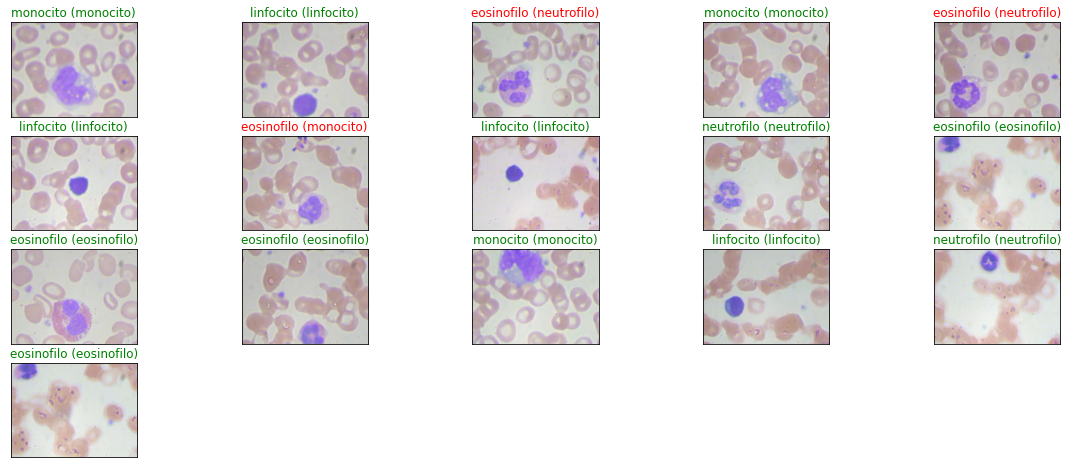

In [510]:
# Final Model - Com Transfer Learning
y_true = [2,1,3,2,3,1,2,1,3,0,0,0,2,1,3,0] #referente as classes no dataset
labels = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo']

figure = plt.figure(figsize=(20,8))

for i in range(16):
    ax = figure.add_subplot(4,5,i+1, xticks=[], yticks=[])
    # Display image
    im = plt.imread(test_set[i])
    ax.imshow(im)
    predict_index = np.argmax(y_pred[i])
    true_index = y_true[i]
    # Set the title for each image
    ax.set_title("{}".format(labels[true_index]))
    # print(predict_index)
    ax.set_title(f"{labels[predict_index]} ({labels[true_index]})",
                                 color=("green" if predict_index == true_index else "red"))

In [ ]:
test_set = glob.glob('/content/comum/*jpeg')
# Carregar o modelo com melhor loss
model = load_model('chest_orientation_model.hdf5')

image_test = np.array([tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(image_name, target_size=(200,200), color_mode = 'rgb'))/255 for image_name in test_set])
y_pred = final_model.predict(image_test)

In [462]:
y_pred[15]

array([0.6065872 , 0.10202871, 0.03236958, 0.9691367 ], dtype=float32)

In [463]:
 np.argmax(y_pred[0])

2

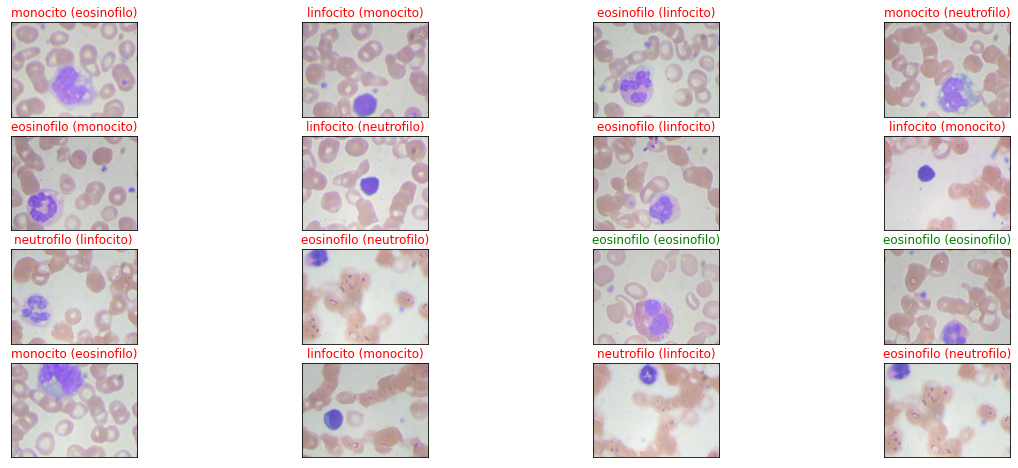

In [496]:
#Model - Sem Transfer Learning
y_true = [0,2,1,3,2,3,1,2,1,3,0,0,0,2,1,3,0] #referente as classes no dataset
labels = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo']
# e = 0, 

figure = plt.figure(figsize=(20,8))

for i in range(16):
    ax = figure.add_subplot(4,4,i+1, xticks=[], yticks=[])
    # Display image
    im = plt.imread(test_set[i])
    ax.imshow(im)
    predict_index = np.argmax(y_pred[i])
    true_index = y_true[i]
    # Set the title for each image
    ax.set_title("{}".format(labels[true_index]))
    # print(predict_index)
    ax.set_title(f"{labels[predict_index]} ({labels[true_index]})",
                                 color=("green" if predict_index == true_index else "red"))

Saving _9_2814.jpeg to _9_2814 (1).jpeg
[1.000000e+00 0.000000e+00 0.000000e+00 4.199557e-10]
0
_9_2814.jpeg is a eosinofilo


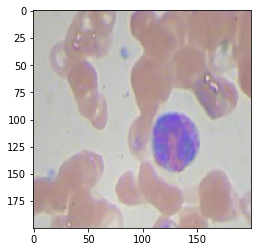

In [495]:
# Verificando imagem a imagem
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = final_model.predict(images, batch_size=10)
  print(classes[0])
  print(np.argmax(classes[0]))
  if np.argmax(classes[0]) == 1:
    print(fn + " is a linfocito")

  if np.argmax(classes[0]) == 2:
    print(fn + " is a monocito")

  if np.argmax(classes[0]) == 3:
    print(fn + " is a neutrofilo")

  if np.argmax(classes[0]) == 0:
    print(fn + " is a eosinofilo")

In [259]:
# Auxiliar
local_zip = '/content/comum.zip' # Caminho referente ao local onde os dados são armazenados quando é feito o upload manualmente
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()